#  機器學習_ML_learning_curve_學習曲線
[API連結](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)  
[官方文件](http://scikit-learn.org/stable/modules/learning_curve.html#learning-curve)  
學習曲線與驗證曲線是在機器學習中很重要的兩條線，透過線的呈現可以明白模型究竟是高偏差(high bias)還是高方差(high variance)。  
為什麼重要?  
因為high bias and high variance在實務上的調校是不相同的!  
你去對一個high bias的模型餵再多的資料，效果恐怕是有限的。  
你去對一個high variance給了更多的特徵，那不是提汽油上場嗎?  
* high bias 代表 underfitting
* high variance 代表 overfitting

學習來自吳恩達老師\_機器學習\_第六週課程
* 更多的數據
    * high variance有效
    * high bias沒效
* 嚐試用更少的特徵
    * high variance有效
* 取得更有效的特徵
    * high bias有效
* 用更高的多項式方式
    * high bias有效
    * high variance是浪費時間
* 減少正規項$\lambda$數值
    * high bias有效
* 增加正規項$\lambda$數值
    * high variance有效
    
學習曲線的部份，從sklearn官方說明可以知道!    
Determines cross-validated training and test scores for different training set sizes.  
確定不同訓練集大小的交叉驗證訓練和測試分數。  
我們可以從學習曲線了解到，我們增加了資料集之後所得的益處有多少!  

## IMPORT
```python
from sklearn.learning_curve import learning_curve
```

## CLASS
```python
sklearn.model_selection.learning_curve(
    estimator, X, y, groups=None, 
    train_sizes=array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
    cv=None, scoring=None, 
    exploit_incremental_learning=False, n_jobs=1,
    pre_dispatch=’all’, verbose=0, shuffle=False, 
    random_state=None)
```

## 參數說明
### estimator 
使用的分類器，但限制為需要有fit、predict兩個method!
### X
訓練資料集
### y
對應訓練資料集的label
### groups 
### train_sizes 
訓練資料集的使用，使用上可以給一個陣列  
像上面的例子([0.1, 0.33, 0.55, 0.78, 1])  
要一直大，限制在0-1之間!  
或是透過np.linspace(0.1,1.0,n)來設置!  
n的部份自行調整!  
### cv 
default 3  
定義拆分折數  
預設使用分層K折交叉驗證。  
### scoring 
模型評估  
可參考[官方關於模型評估的類型](http://scikit-learn.org/stable/modules/model_evaluation.html)  
### exploit_incremental_learning
default False
### n_jobs 
default 1  
使用多少CPU核心數   
-1代表火力全開  
### pre_dispatch
### verbose 
default 0  
過程是否輸出  
0不輸出  
1偶爾輸出  
2一定輸出  
### shuffle 
是否要亂數排序
### random_state 
default None  
隨機數種子  

## 屬性
回傳三個值!
### train_sizes_abs 
資料集的切割狀況  
假如有1000，你設置了np.linspace(0.1,1.0,10)  
那就會回傳100,200,....1000  
### train_scores 
訓練資料集分數
### test_scores 
測試資料集分數

## 範例
下面是一個來自官方的範例

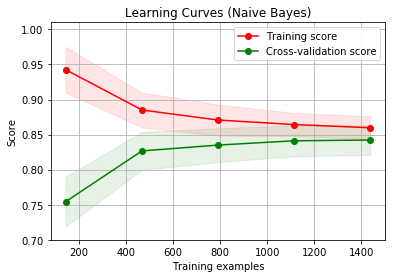

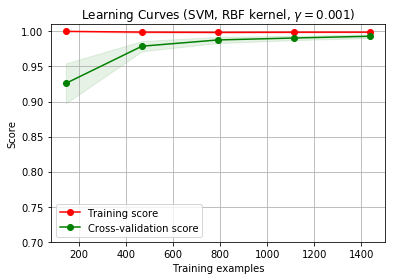

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

上圖的部份，可以明確的發現，資料集的增加並未對模型帶來好的效果，並且這是一個高偏差的模型，調整上增加再多的模型也沒有用。  
而下圖的部份在資料集的增加情況下，是有明顯的讓驗證資料集也提升。  

## 範例2
書名：Python Machine Learning  
作者：Sebastian Raschka  
ISBN:978-986-434-140-5  

In [5]:
# import lib
import matplotlib.pyplot as plt
#  學習曲線
from sklearn.learning_curve import learning_curve
#  驗證曲線
from sklearn.learning_curve import validation_curve
#  標準化
from sklearn.preprocessing import StandardScaler
#  標籤編碼
from sklearn.preprocessing import LabelEncoder
#  資料分集
from sklearn.model_selection import train_test_split
#  管道
from sklearn.pipeline import Pipeline
#  logistic
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# get dateset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
#  將標籤編碼
le = LabelEncoder()
#  訓練之後直接轉換
y = le.fit_transform(y)
le.transform(['M', 'B'])

#  資料拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
#  設置pipeline
pipe_lr = Pipeline([
    ('scl', StandardScaler()),  #  標準化
    ('clf', LogisticRegression(  #  logistic , 正規方式為l2
                    penalty='l2', random_state=0))
])
#  訓練，learning_curve預設使用分層k折交叉驗證法
train_sizes, train_scores, test_scores = learning_curve(
                                estimator=pipe_lr,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=10,
                                n_jobs=1)

In [8]:
#  訓練曲線
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#  設置x軸是資料集，而y軸是十折的平均得分
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training accuracy')
#  設置訓練曲線的均值+-標準差的區塊呈現
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

In [9]:
#  驗證曲線
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#  設置x軸是資料集，而y軸是十折的平均得分
plt.plot(train_sizes,test_mean,color='green',marker='s', linestyle='--',markersize=5,label='Validation accuracy')
#  設置驗證曲線的均值+-標準差的區塊呈現
plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

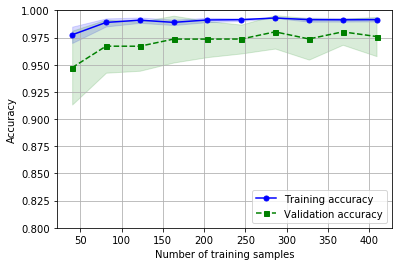

In [10]:
#  設置格線
plt.grid() 
#  設置x、y軸
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
#  產生標識在右下
plt.legend(loc='lower right')
#  設置y軸間距
plt.ylim([0.8, 1.0])
plt.show()

從圖形可以看的出來，針對訓練資料集的部份，正負了標準差之後的區域差異不大，但在驗證資料集的部份卻並非如此，這代表著這個模型有著過適的問題。